# <span style="color:darkblue"> QTM 151 - Quiz 4 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [ ]:
# Write your answer here
print('Joy Qu')

Joy Qu


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print('I will abide by Emory\'s code of conduct')

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [3]:
# Write your answer here
# Import the matplotlib library
import matplotlib.pyplot as plt

# Import the pandas library
import pandas as pd

<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 16.


In [24]:
# Write your own code
# Read the 'currencies' dataset
currencies = pd.read_csv('data_raw/currencies.csv')

# Convert the 'date_string' column to datetime format
# Format the 'date_string' column using wildcards
currencies['date'] = pd.to_datetime(currencies['date_string'], format = '%A, %b %d, %Y')

# Print the 'date' column
print(currencies['date'])

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6320   2023-03-27
6321   2023-03-28
6322   2023-03-29
6323   2023-03-30
6324   2023-03-31
Name: date, Length: 6325, dtype: datetime64[ns]


<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 18 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


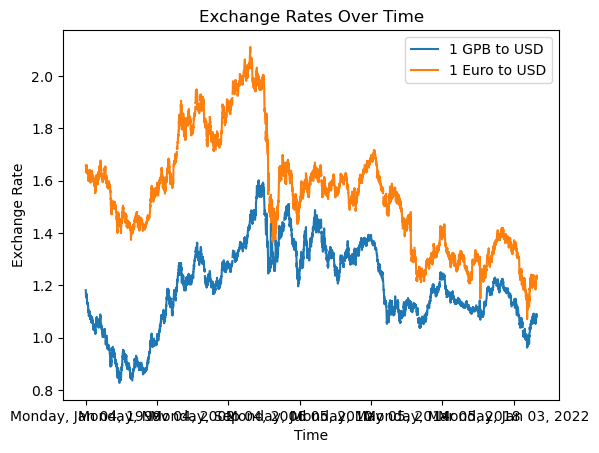

In [8]:
# Write your own code
# Plot the exchange rates over time
currencies[['date', 'gbp_to_usd', 'eur_to_usd']].set_index('date').plot()

# Label the axes and title
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates Over Time')

# Add a legend
plt.legend(['1 GPB to USD', '1 Euro to USD'])

<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)```

In [ ]:
# Write your own code
# Calculate the growth rate of 'eur_to_usd'
# Calculate the difference in 'eur_to_usd' from the previous day
currencies['growth_euro'] = (currencies['eur_to_usd'].diff() / 
                             
# Divide by the previous day's value
# Calculate the percentage change
                             currencies['eur_to_usd'].shift(1)) * 100

# Display the 'growth_euro' column
currencies['growth_euro']

0            NaN
1      -0.090465
2      -0.114693
3      -0.314256
4      -0.545620
          ...   
6320    0.433538
6321    0.513113
6322   -0.226886
6323    0.446682
6324    0.008085
Name: growth_euro, Length: 6325, dtype: float64

<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 18 to create a shaded region <br>
for time periods where "bool_cond" is true.



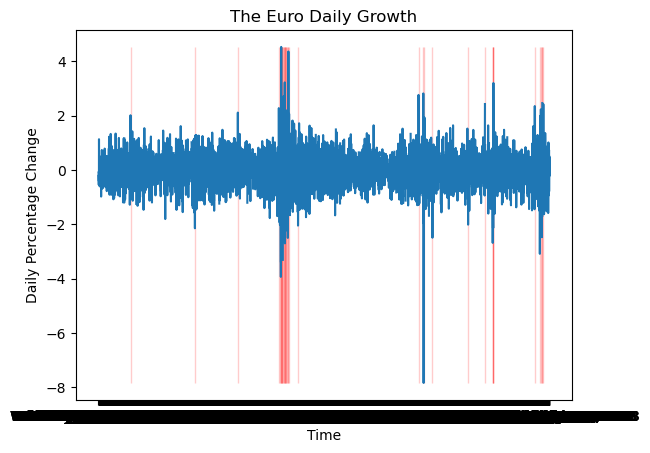

In [ ]:
# Write your own code
# Create 'bool_cond' column to identify 'growth_euro' values > 2 or < -2
currencies['bool_cond'] = (currencies['growth_euro'] > 2) | (currencies['growth_euro'] < -2)

# Plot 'growth_euro' over time
plt.plot('date', 'growth_euro', data = currencies)

# Label the axes and title
plt.xlabel('Time')
plt.ylabel('Daily Percentage Change')
plt.title('The Euro Daily Growth')

# Define 'vec_y' for fill_between
vec_y = currencies['growth_euro']

# Plot the fill_between area
plt.fill_between(x = currencies['date'],
                 
# Define the lower bound for the fill_between
                 y1 = vec_y.min(),

# Define the upper bound for the fill_between
                 y2 = vec_y.max(),

# Define the condition for filling
                 where = currencies['bool_cond'],

# Format the fill_between area
                 alpha = 0.2, color = 'red')

# Show the plot
plt.show()

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 16 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [ ]:
# Write your own code
# Aggregate the data by month
month_config = pd.Grouper(key='date_format', freq='m')

# Group 'currencies' by month
monthlydata = (currencies.groupby(month_config) 
               
# Calculate the standard deviation of 'eur_to_usd' for each month
               .agg(eur_to_usd_std = ('eur_to_usd','std'))

# Reset the index
               .reset_index())

# Display the 'monthlydata' dataset
monthlydata

/var/folders/tf/pxjm37j50t1f3zlbsrq8yt5h0000gn/T/ipykernel_99180/3735421321.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_config = pd.Grouper(key='date_format', freq='m')


,date_format,eur_to_usd_std
0,1999-01-31,0.007345
1,1999-02-28,0.013345
2,1999-03-31,0.010475
3,1999-04-30,0.006172
4,1999-05-31,0.013046
...,...,...
286,2022-11-30,0.027308
287,2022-12-31,0.011389
288,2023-01-31,0.015046
289,2023-02-28,0.008972


<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 18 for details on ```pd.melt()```

In [ ]:
# Write your own code
# Reshape the 'currencies' dataset from wide to long format
currencies_long = pd.melt(currencies,
                          
# Specify the new column names
                          var_name = 'type',
                          value_name = 'exchange_rate',

# Specify the identifier variable column
                          id_vars = 'date',

# Specify the columns to unpivot
                          value_vars = ['eur_to_usd','gbp_to_usd'])

# Display the 'currencies_long' dataset
currencies_long

,date,type,exchange_rate
0,"Monday, Jan 04, 1999",eur_to_usd,1.6581
1,"Tuesday, Jan 05, 1999",eur_to_usd,1.6566
2,"Wednesday, Jan 06, 1999",eur_to_usd,1.6547
3,"Thursday, Jan 07, 1999",eur_to_usd,1.6495
4,"Friday, Jan 08, 1999",eur_to_usd,1.6405
...,...,...,...
12645,"Monday, Mar 27, 2023",gbp_to_usd,1.0789
12646,"Tuesday, Mar 28, 2023",gbp_to_usd,1.0844
12647,"Wednesday, Mar 29, 2023",gbp_to_usd,1.0826
12648,"Thursday, Mar 30, 2023",gbp_to_usd,1.0899
